In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/ParisHousing.csv")
data = data.dropna()
data = data.head(1000)
data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17193,18,0,1,72,88316,9,4,2018,1,1,4118,1381,774,0,5,1724888.8
996,72730,58,0,0,38,37518,2,10,1993,1,0,9441,9775,854,1,0,7276501.3
997,50152,39,1,0,70,1849,10,7,2015,0,1,7389,968,413,0,2,5018454.5
998,88898,53,1,1,52,71476,9,6,2018,0,0,9679,9017,220,1,5,8902046.8


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)

In [ ]:
X = data[:, :-1]
t = data[:, -1]
n_samples = len(data)
n_features = X.shape[1]

In [ ]:
'''
from sklearn.datasets import make_regression
n_features = 5
n_samples = 10
X, t = make_regression(n_samples, n_features, noise=1, random_state=42)
X = np.array(X)
t = np.array(t)
'''

'\nfrom sklearn.datasets import make_regression\nn_features = 5\nn_samples = 10\nX, t = make_regression(n_samples, n_features, noise=1, random_state=42)\nX = np.array(X)\nt = np.array(t)\n'

In [ ]:
# initialize wts and bias
W = np.ones(n_features)
b = 0
n = 0.0005  #0.1
epochs = 20
mse = []

In [ ]:
# update wts and bias
for j in range(epochs):
  for i in range(n_samples):
      y = np.dot(X[i],W) + b
      e = t[i] - y
      W = W + n * e * X[i]
      b = b + n * e
  mse.append(np.mean((t-(np.dot(X, W) + b))**2))

In [ ]:
print(f'Final Weights: {W}')
print(f'Final Bias: {b}')

Final Weights: [ 9.99995255e-01  6.35785510e-05  6.43129544e-04  7.07230253e-04
  5.82053278e-04  1.19359685e-04  6.73210555e-05  3.27125578e-06
 -5.43611067e-05  1.09731417e-04  1.33227925e-04  1.74285795e-04
 -2.92291175e-05  1.18594407e-04  5.97034905e-05  1.43615566e-04]
Final Bias: 1.6654918283798054e-07


In [ ]:
mse

[5.4553101690994685,
 2.0269597049513024,
 0.7631621408385009,
 0.2907784821506593,
 0.11196623871740993,
 0.04351198388616587,
 0.017044429555350505,
 0.006722289358403342,
 0.002666795747615079,
 0.0010633084640034145,
 0.0004258914959001354,
 0.0001713465235975832,
 6.930215877971699e-05,
 2.8258422710909634e-05,
 1.1703354593280002e-05,
 5.009570947675319e-06,
 2.2973063601428138e-06,
 1.1962635799205035e-06,
 7.485430422140833e-07,
 5.662012771844331e-07]

Text(0.5, 0, 'Epochs')

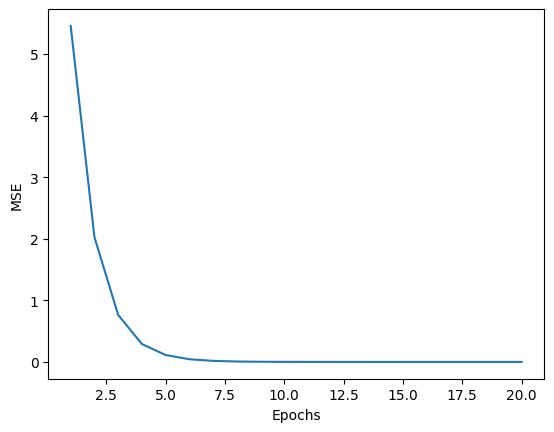

In [ ]:
plt.plot(range(1, epochs + 1),mse)
plt.ylabel("MSE")
plt.xlabel("Epochs")